Text(-20, 20, 'NMI 732C NBS430 ±1ppm?')

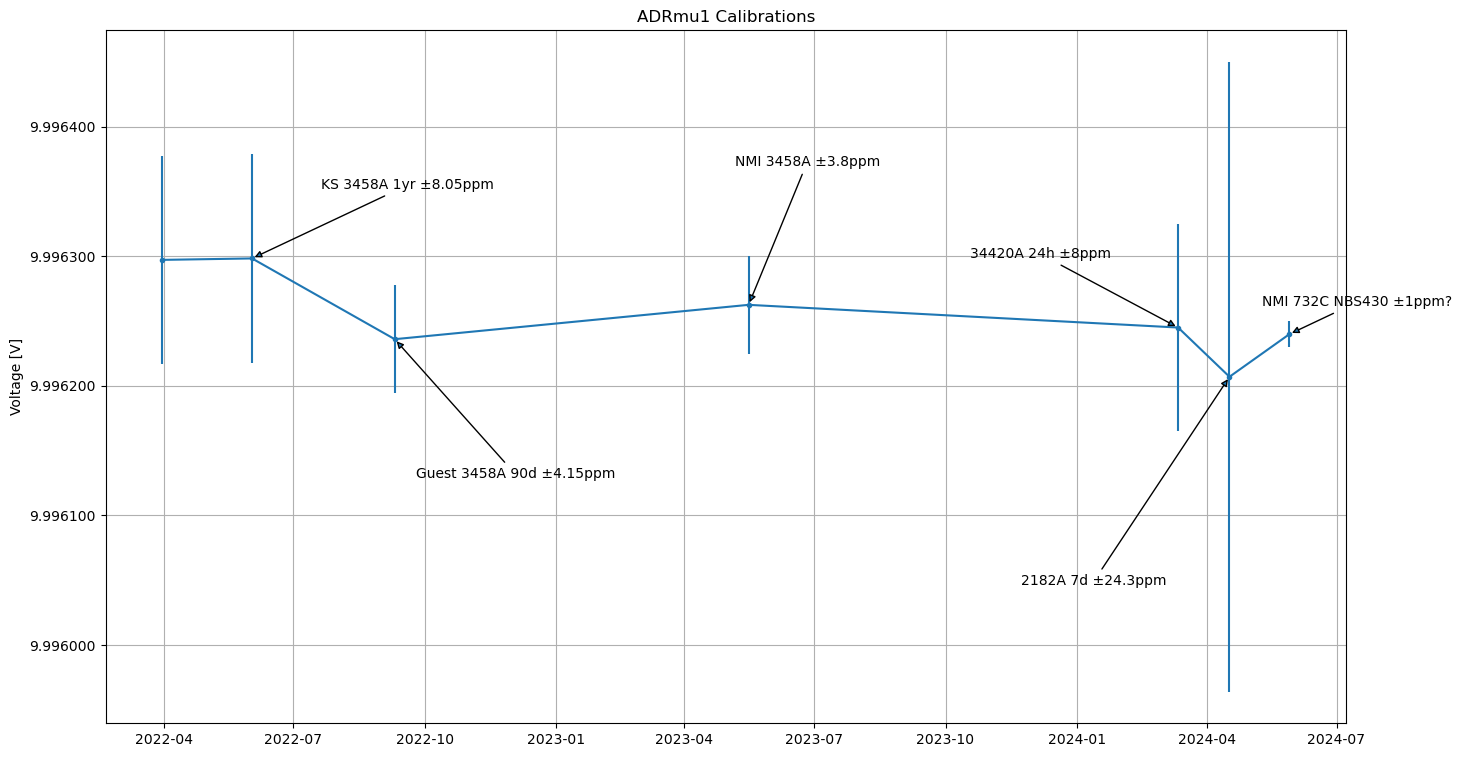

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import FormatStrFormatter

df = pd.DataFrame({
    'time':[
        '31.03.2022', '02.06.2022', '10.09.2022', '16.05.2023', '12.03.2024', '17.04.2024', '29.05.2024'
    ],
    'volt':[
        9.99629718, 9.9962983, 9.996236, 9.996262499, 9.996244988, 9.996207002, 9.996239885
    ],
    'uncertainty':[
        8.05, 8.05, 4.15, 3.8, 8, 24.3, 1
    ],
})

datetime_series = pd.to_datetime(df['time'], dayfirst=True)
datetime_index = pd.DatetimeIndex(datetime_series.values)
df2=df.set_index(datetime_index)

fig,ax = plt.subplots(figsize=(16,9))

#plt.figure(facecolor='white') # fix for exporting png file
ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))


plt.ylabel('Voltage [V]')
plt.grid(True, which="both")
plt.title('ADRmu1 Calibrations')


plt.errorbar(df2.index, df2['volt'], yerr=df2['uncertainty']/100000, fmt='.-');

ax.annotate('KS 3458A 1yr ±8.05ppm', (mdates.date2num(df2.index[1]), df2['volt'][1]),xytext=(50, 50),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('Guest 3458A 90d ±4.15ppm', (mdates.date2num(df2.index[2]), df2['volt'][2]),xytext=(15, -100),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('NMI 3458A ±3.8ppm', (mdates.date2num(df2.index[3]), df2['volt'][3]),xytext=(-10, 100),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('34420A 24h ±8ppm', (mdates.date2num(df2.index[4]), df2['volt'][4]),xytext=(-150, 50),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('2182A 7d ±24.3ppm', (mdates.date2num(df2.index[5]), df2['volt'][5]),xytext=(-150, -150),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('NMI 732C NBS430 ±1ppm?', (mdates.date2num(df2.index[6]), df2['volt'][6]),xytext=(-20, 20),textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))